In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS

In [2]:
wm= pd.read_csv(r'H:\machine  learning internship\verzeo\Womens_Clothing_E_Commerce_Reviews.csv');
wm.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
wm.drop(['Unnamed: 0'],axis=1,inplace=True)
wm.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
wm=wm.rename(columns={'Clothing ID' : 'Clothing_ID','Review Text':'Review_Text'})

In [5]:
wm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing_ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review_Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [6]:
wm['Rating'].unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [7]:
wm['Category']='Good'
wm.loc[wm['Rating']<=3,['Category']]='Bad'
wm.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Good
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Good
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good


# data analyzing

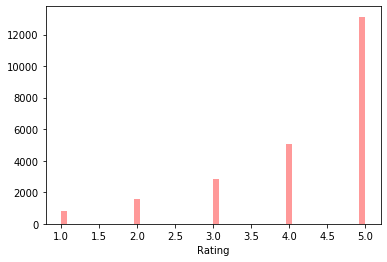

In [8]:
sns.distplot(wm['Rating'],kde=False,hist=True,color=["Red"])

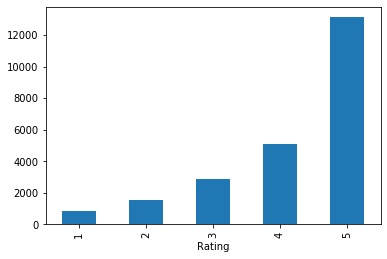

In [9]:
wmra=wm.groupby('Rating').Clothing_ID.count()
wmra.plot(kind='bar')

In [10]:
wmcl1=wm.pivot_table(index="Clothing_ID",aggfunc='size')
wmcl1=wmcl1.sort_values(ascending=False)
wmcl1


#for number of clothing id repeats.

Clothing_ID
1078    1024
862      806
1094     756
1081     582
872      545
        ... 
740        1
738        1
379        1
735        1
0          1
Length: 1206, dtype: int64

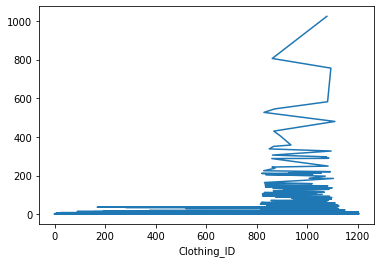

In [11]:
wmcl1.plot()

In [12]:
wmcl2=wm.groupby('Category').Clothing_ID.count()
wmcl2

Category
Bad      5278
Good    18208
Name: Clothing_ID, dtype: int64

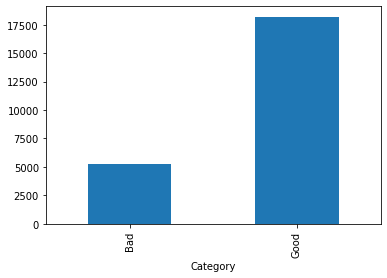

In [13]:
wmcl2.plot(kind='bar')

In [14]:
wmcl3=wm[wm.Category=='Good']
wmcl3a=wmcl3.pivot_table(index="Clothing_ID",aggfunc="size")
wmcl3a=wmcl3a.sort_values(ascending=False)

wmcl3a.head()  #no of good reviews of a clothing id

Clothing_ID
1078    796
862     627
1094    584
1081    471
872     459
dtype: int64

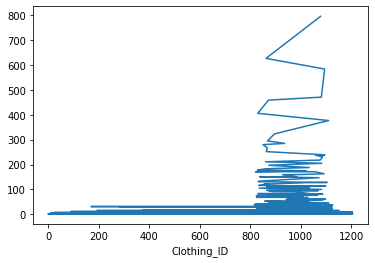

In [15]:
wmcl3a.plot()

In [16]:
wmcl4=wm[wm.Category=='Bad']
wmcl4a=wmcl4.pivot_table(index="Clothing_ID",aggfunc="size")
wmcl4a=wmcl4a.sort_values(ascending=False)

wmcl4a.head()  #no of bad reviews of a clothing id

Clothing_ID
1078    228
862     179
1094    172
868     135
829     121
dtype: int64

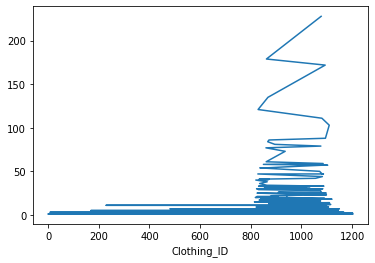

In [17]:
wmcl4a.plot()

In [18]:
wm.corr(method='pearson')

,Clothing_ID,Age,Rating,Recommended IND,Positive Feedback Count
Clothing_ID,1.000000,0.017972,-0.018879,-0.016206,0.046356
Age,0.017972,1.000000,0.026831,0.030622,0.043079
Rating,-0.018879,0.026831,1.000000,0.792336,-0.064961
Recommended IND,-0.016206,0.030622,0.792336,1.000000,-0.069045
Positive Feedback Count,0.046356,0.043079,-0.064961,-0.069045,1.000000


From Above we can  decide we should try with Recommended id,

In [19]:
wmr=wm[['Recommended IND','Rating','Category']]
wmr1=wmr.groupby(['Recommended IND','Category']).count().unstack('Category')
wmr1

Rating       
Category           Bad   Good
Recommended IND              
0                 3979    193
1                 1299  18015

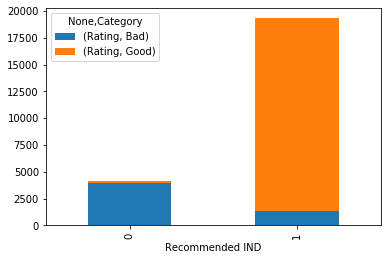

In [20]:
wmr1.plot(kind='bar',stacked=True)

From above we can easily say that if Recommended INd is provided then, 0=Bad and 1=good for most cases.
it will be helpful for our project to be based on recommended ind


In [21]:
wma=wm[['Age','Category']]
wma1=wma.groupby(['Age','Category']).count()
wma1

Empty DataFrame
Columns: []
Index: [(18, Good), (19, Bad), (19, Good), (20, Bad), (20, Good), (21, Bad), (21, Good), (22, Bad), (22, Good), (23, Bad), (23, Good), (24, Bad), (24, Good), (25, Bad), (25, Good), (26, Bad), (26, Good), (27, Bad), (27, Good), (28, Bad), (28, Good), (29, Bad), (29, Good), (30, Bad), (30, Good), (31, Bad), (31, Good), (32, Bad), (32, Good), (33, Bad), (33, Good), (34, Bad), (34, Good), (35, Bad), (35, Good), (36, Bad), (36, Good), (37, Bad), (37, Good), (38, Bad), (38, Good), (39, Bad), (39, Good), (40, Bad), (40, Good), (41, Bad), (41, Good), (42, Bad), (42, Good), (43, Bad), (43, Good), (44, Bad), (44, Good), (45, Bad), (45, Good), (46, Bad), (46, Good), (47, Bad), (47, Good), (48, Bad), (48, Good), (49, Bad), (49, Good), (50, Bad), (50, Good), (51, Bad), (51, Good), (52, Bad), (52, Good), (53, Bad), (53, Good), (54, Bad), (54, Good), (55, Bad), (55, Good), (56, Bad), (56, Good), (57, Bad), (57, Good), (58, Bad), (58, Good), (59, Bad), (59, Good), (60, Bad), (60, Good), (61, Bad), (61, Good), (62, Bad), (62, Good), (63, Bad), (63, Good), (64, Bad), (64, Good), (65, Bad), (65, Good), (66, Bad), (66, Good), (67, Bad), (67, Good), (68, Bad), ...]

[146 rows x 0 columns]

In [22]:
wma['Age_group']=pd.cut(wma.Age,bins=[2,15,30,45,60,75,90],labels=['2-14','15-29','30-44','45-59','60-74','75-90'])
wma2=wma.groupby('Age_group').count()
wma2

,Age,Category
Age_group,,
2-14,0,0
15-29,3338,3338
30-44,11029,11029
45-59,6682,6682
60-74,2270,2270
75-90,154,154


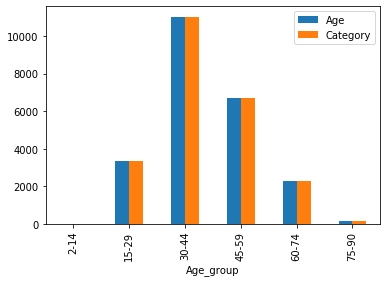

In [23]:
wma2.plot(kind='bar')

In [24]:
wma3=wma.groupby(['Age_group','Category']).count().unstack('Category')
print(wma3)


              Age        
Category      Bad    Good
Age_group                
2-14          NaN     NaN
15-29       774.0  2564.0
30-44      2573.0  8456.0
45-59      1456.0  5226.0
60-74       448.0  1822.0
75-90        23.0   131.0


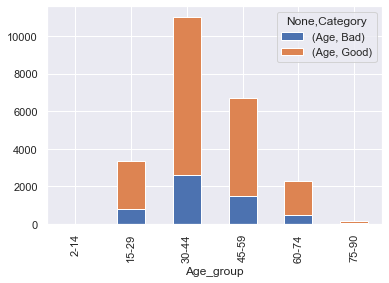

In [25]:
sns.set()
wma3.plot(kind='bar', stacked=True)

# Data cleaning

In [26]:
wm.drop(['Clothing_ID'],axis=1,inplace=True)
wm.head()

,Age,Title,Review_Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Category
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Good
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Good
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good


In [27]:
wm1=wm.copy()
wm1=wm1.dropna(subset=['Review_Text'])
wm1.head()

,Age,Title,Review_Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Category
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Good
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Good
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good


In [28]:
wm1.shape


(22641, 10)

In [29]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
from bs4 import BeautifulSoup as bs
import string
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer as wnl
from nltk.tokenize import RegexpTokenizer as ret
from nltk.stem.porter import PorterStemmer as ps



def rem_punc(text) :
    puncless="".join([c for c in text not in string.punctuation])
    return puncless
wm1['Review Text']=wm1['Review Text'].apply(lambda x : rem_punc())
wm1['Review Text'].head(20)

In [31]:
# Remove punctuatuions and lower words.

tokenizer = ret(r'\w+')
wm1['Review_Text']= wm1['Review_Text'].apply(lambda x : tokenizer.tokenize(x.lower()))
wm1['Review_Text'].head(10)

0    [absolutely, wonderful, silky, and, sexy, and,...
1    [love, this, dress, it, s, sooo, pretty, i, ha...
2    [i, had, such, high, hopes, for, this, dress, ...
3    [i, love, love, love, this, jumpsuit, it, s, f...
4    [this, shirt, is, very, flattering, to, all, d...
5    [i, love, tracy, reese, dresses, but, this, on...
6    [i, aded, this, in, my, basket, at, hte, last,...
7    [i, ordered, this, in, carbon, for, store, pic...
8    [i, love, this, dress, i, usually, get, an, xs...
9    [i, m, 5, 5, and, 125, lbs, i, ordered, the, s...
Name: Review_Text, dtype: object

In [32]:
#remove stopwords
def rem_stopwords(text) :
    word=[w for w in text if w not in stopwords.words('english')]
    return word
wm1['Review_Text']= wm1['Review_Text'].apply(lambda x : rem_stopwords(x))
wm1['Review_Text'].head(10)

0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, dress, sooo, pretty, happened, find, st...
2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
5    [love, tracy, reese, dresses, one, petite, 5, ...
6    [aded, basket, hte, last, mintue, see, would, ...
7    [ordered, carbon, store, pick, ton, stuff, alw...
8    [love, dress, usually, get, xs, runs, little, ...
9    [5, 5, 125, lbs, ordered, petite, make, sure, ...
Name: Review_Text, dtype: object

In [33]:
lemmatizer=wnl()
def lemm(text) : 
    lt=[lemmatizer.lemmatize(i) for i in text]
    return lt
wm1['Review_Text']=wm1['Review_Text'].apply(lambda x : lemm(x))
wm1['Review_Text'].head(10)

0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, dress, sooo, pretty, happened, find, st...
2    [high, hope, dress, really, wanted, work, init...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
5    [love, tracy, reese, dress, one, petite, 5, fo...
6    [aded, basket, hte, last, mintue, see, would, ...
7    [ordered, carbon, store, pick, ton, stuff, alw...
8    [love, dress, usually, get, x, run, little, sn...
9    [5, 5, 125, lb, ordered, petite, make, sure, l...
Name: Review_Text, dtype: object

In [34]:
# Remove numbers
def rem_digit(text) :
    output = ' '.join(c for c in text if not c.isdigit())
    return output
wm1['Review_Text']=wm1['Review_Text'].apply(lambda x : rem_digit(x))
wm1['Review_Text'].head(10)

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store gla...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
5    love tracy reese dress one petite foot tall us...
6    aded basket hte last mintue see would look lik...
7    ordered carbon store pick ton stuff always try...
8    love dress usually get x run little snug bust ...
9    lb ordered petite make sure length long typica...
Name: Review_Text, dtype: object

(-0.5, 399.5, 199.5, -0.5)

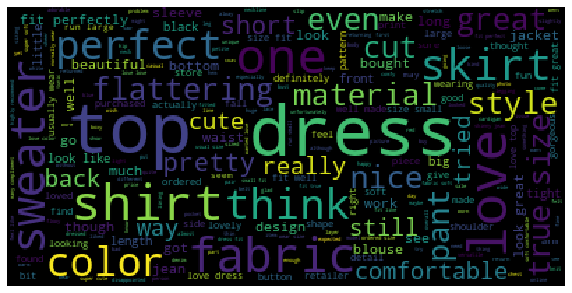

In [35]:
words=wm1.Review_Text
plt.figure(figsize = (10,12))
wccm = WordCloud(background_color = "black", max_words = 1000,  max_font_size = 50)
wccm.generate(' '.join(words))
plt.imshow(wccm)
plt.axis('off') #all words 

In [36]:
wmc=wm1.copy()
wmc.head(10)

,Age,Title,Review_Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Category
0,33,NaN,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,Good
1,34,NaN,love dress sooo pretty happened find store gla...,5,1,4,General,Dresses,Dresses,Good
2,60,Some major design flaws,high hope dress really wanted work initially o...,3,0,0,General,Dresses,Dresses,Bad
3,50,My favorite buy!,love love love jumpsuit fun flirty fabulous ev...,5,1,0,General Petite,Bottoms,Pants,Good
4,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses,Good
5,49,Not for the very petite,love tracy reese dress one petite foot tall us...,2,0,4,General,Dresses,Dresses,Bad
6,39,Cagrcoal shimmer fun,aded basket hte last mintue see would look lik...,5,1,1,General Petite,Tops,Knits,Good
7,39,"Shimmer, surprisingly goes with lots",ordered carbon store pick ton stuff always try...,4,1,4,General Petite,Tops,Knits,Good
8,24,Flattering,love dress usually get x run little snug bust ...,5,1,0,General,Dresses,Dresses,Good
9,34,Such a fun dress!,lb ordered petite make sure length long typica...,5,1,0,General,Dresses,Dresses,Good


In [37]:
wo= nltk.FreqDist(wmc.Review_Text)
wmw1 = pd.DataFrame(wo.most_common(),columns=['Word', 'Frequency'])
wmw1.head()

,Word,Frequency
0,perfect fit gotten many compliment buy suit,3
1,purchased another eva franco dress retailer re...,2
2,shirt beautiful however thought made softer li...,2
3,love love jean short come right ankle super so...,2
4,bought shirt store going home trying promptly ...,2


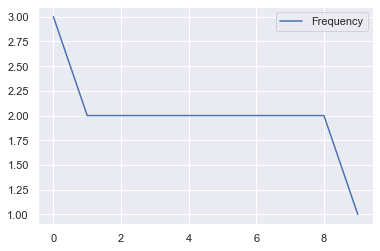

In [38]:
wmw1.head(10).plot()

In [39]:
#tfidf vectoriziation output (a,b) c = a:=no of reviews, b:=word vector index c:= value of tfidf
from sklearn.feature_extraction.text import TfidfVectorizer as tfidfv
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
tfidf = tfidfv(max_features=1000,ngram_range=(1,2),analyzer='word')
wmct= tfidf.fit_transform(wmc['Review_Text'])
print(wmct)

  (0, 142)	0.26908313656134575
  (0, 732)	0.5029911966336686
  (0, 750)	0.54868250035246
  (0, 970)	0.4745023713096423
  (0, 5)	0.3852131035619599
  (1, 981)	0.27333153893955603
  (1, 574)	0.27188532537085425
  (1, 482)	0.1935659558406915
  (1, 895)	0.25798723601892776
  (1, 793)	0.2209600514554285
  (1, 893)	0.1581520382507169
  (1, 175)	0.16962361159609837
  (1, 412)	0.1987925097593128
  (1, 454)	0.12816247011091328
  (1, 374)	0.18820969187969883
  (1, 434)	0.1415752945659893
  (1, 88)	0.13719121872988851
  (1, 607)	0.45415871593228846
  (1, 563)	0.16303769448628985
  (1, 571)	0.12583028749526146
  (1, 980)	0.23150960421437008
  (1, 540)	0.2188998552507152
  (1, 324)	0.20234408994766295
  (1, 813)	0.15168142361541673
  (1, 270)	0.1849229258503305
  :	:
  (22639, 72)	0.13832397910273486
  (22639, 442)	0.09088816920578764
  (22639, 462)	0.12820638528231734
  (22639, 600)	0.11192746652756819
  (22639, 318)	0.13480653396204106
  (22639, 275)	0.15381870774570205
  (22639, 514)	0.133869252

In [40]:
#bag of words

bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,2),analyzer = "word")
wmcb = bow.fit_transform(wmc['Review_Text'])
print(wmcb)

  (0, 5)	1
  (0, 970)	1
  (0, 750)	1
  (0, 732)	1
  (0, 142)	1
  (1, 480)	2
  (1, 194)	1
  (1, 637)	1
  (1, 270)	1
  (1, 813)	1
  (1, 324)	1
  (1, 540)	1
  (1, 980)	2
  (1, 571)	1
  (1, 563)	1
  (1, 607)	3
  (1, 88)	1
  (1, 434)	1
  (1, 374)	1
  (1, 454)	1
  (1, 412)	1
  (1, 175)	1
  (1, 893)	1
  (1, 793)	1
  (1, 895)	1
  :	:
  (22639, 742)	1
  (22639, 519)	1
  (22639, 515)	1
  (22639, 828)	1
  (22639, 846)	1
  (22639, 911)	1
  (22639, 847)	1
  (22639, 550)	1
  (22639, 283)	1
  (22639, 952)	1
  (22639, 89)	1
  (22639, 523)	1
  (22640, 194)	1
  (22640, 275)	1
  (22640, 943)	1
  (22640, 267)	1
  (22640, 604)	1
  (22640, 284)	1
  (22640, 144)	1
  (22640, 491)	1
  (22640, 673)	1
  (22640, 211)	1
  (22640, 212)	1
  (22640, 371)	1
  (22640, 372)	1


In [41]:
#Sentiment values for our model data.
from textblob import TextBlob as tb
wmc['pn_review_index']=wmc['Review_Text'].apply(lambda x : tb(x).sentiment[0])
wmc.head(10)
#it might have some inconsistenchy in data
#stars may not match with reviews
#so bad category has good reviews
#the p/n is towards -1 then very bad while 1 is very good
# 0 is neutral
# remember it is not according to stars,it is according to the reviews.


,Age,Title,Review_Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Category,pn_review_index
0,33,NaN,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,Good,0.633333
1,34,NaN,love dress sooo pretty happened find store gla...,5,1,4,General,Dresses,Dresses,Good,0.318750
2,60,Some major design flaws,high hope dress really wanted work initially o...,3,0,0,General,Dresses,Dresses,Bad,0.082300
3,50,My favorite buy!,love love love jumpsuit fun flirty fabulous ev...,5,1,0,General Petite,Bottoms,Pants,Good,0.500000
4,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses,Good,0.458333
5,49,Not for the very petite,love tracy reese dress one petite foot tall us...,2,0,4,General,Dresses,Dresses,Bad,0.150000
6,39,Cagrcoal shimmer fun,aded basket hte last mintue see would look lik...,5,1,1,General Petite,Tops,Knits,Good,0.075625
7,39,"Shimmer, surprisingly goes with lots",ordered carbon store pick ton stuff always try...,4,1,4,General Petite,Tops,Knits,Good,0.196154
8,24,Flattering,love dress usually get x run little snug bust ...,5,1,0,General,Dresses,Dresses,Good,-0.046875
9,34,Such a fun dress!,lb ordered petite make sure length long typica...,5,1,0,General,Dresses,Dresses,Good,0.250476


In [42]:
wmc['pnreviews']=pd.cut(wmc.pn_review_index,bins=[-1,-0.001,0,1],labels=['Neg','Neu','Pos'])
wmc.head(10)

,Age,Title,Review_Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Category,pn_review_index,pnreviews
0,33,NaN,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,Good,0.633333,Pos
1,34,NaN,love dress sooo pretty happened find store gla...,5,1,4,General,Dresses,Dresses,Good,0.318750,Pos
2,60,Some major design flaws,high hope dress really wanted work initially o...,3,0,0,General,Dresses,Dresses,Bad,0.082300,Pos
3,50,My favorite buy!,love love love jumpsuit fun flirty fabulous ev...,5,1,0,General Petite,Bottoms,Pants,Good,0.500000,Pos
4,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses,Good,0.458333,Pos
5,49,Not for the very petite,love tracy reese dress one petite foot tall us...,2,0,4,General,Dresses,Dresses,Bad,0.150000,Pos
6,39,Cagrcoal shimmer fun,aded basket hte last mintue see would look lik...,5,1,1,General Petite,Tops,Knits,Good,0.075625,Pos
7,39,"Shimmer, surprisingly goes with lots",ordered carbon store pick ton stuff always try...,4,1,4,General Petite,Tops,Knits,Good,0.196154,Pos
8,24,Flattering,love dress usually get x run little snug bust ...,5,1,0,General,Dresses,Dresses,Good,-0.046875,Neg
9,34,Such a fun dress!,lb ordered petite make sure length long typica...,5,1,0,General,Dresses,Dresses,Good,0.250476,Pos


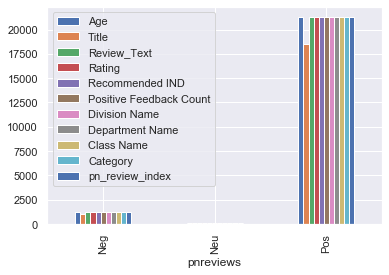

In [43]:
wmcc1=wmc.groupby('pnreviews').count()
wmcc1
wmcc1.plot(kind='bar')

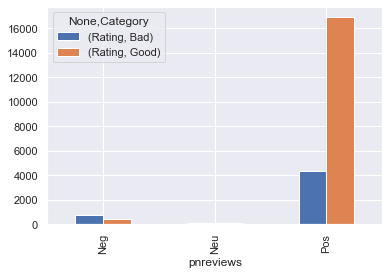

In [44]:
wmcr=wmc[['Rating','Category','pnreviews']]
wmcr1=wmcr.groupby(['pnreviews','Category']).count().unstack('Category')
wmcr1.plot(kind='bar')
#this tells accuracy of sentiment analysis on the reviews

(-0.5, 399.5, 199.5, -0.5)

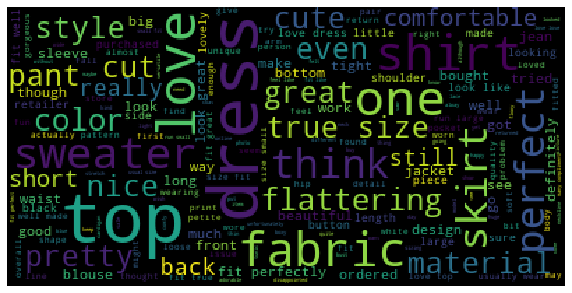

In [45]:

pr=wmc.Review_Text[wmc.pnreviews=="Pos"]
plt.figure(figsize = (10,12))
wccc = WordCloud(background_color = "black", max_words = 1000,  max_font_size = 50)
wccc.generate(' '.join(pr))
plt.imshow(wccc)
plt.axis('off')  #positive review words.

(-0.5, 399.5, 199.5, -0.5)

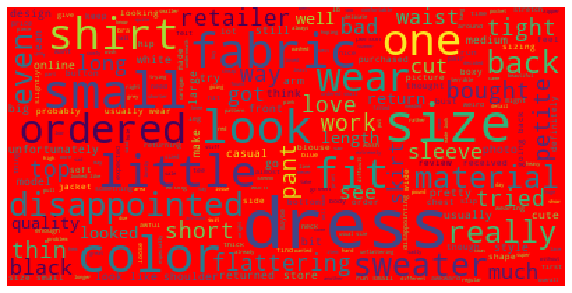

In [46]:
ng=wmc.Review_Text[wmc.pnreviews=="Neg"]
plt.figure(figsize = (10,12))
wcc = WordCloud(background_color = "red", max_words = 1000,  max_font_size = 50)
wcc.generate(' '.join(ng))
plt.imshow(wcc)
plt.axis('off')

# different models

In [47]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words

import nltk

from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer


    

ModuleNotFoundError: No module named 'stop_words'

In [48]:
wmlr=wmc[['Review_Text','Recommended IND','Category']]
wmlr1=wmc[['Review_Text','Recommended IND']]
wmlr.head(10)

,Review_Text,Recommended IND,Category
0,absolutely wonderful silky sexy comfortable,1,Good
1,love dress sooo pretty happened find store gla...,1,Good
2,high hope dress really wanted work initially o...,0,Bad
3,love love love jumpsuit fun flirty fabulous ev...,1,Good
4,shirt flattering due adjustable front tie perf...,1,Good
5,love tracy reese dress one petite foot tall us...,0,Bad
6,aded basket hte last mintue see would look lik...,1,Good
7,ordered carbon store pick ton stuff always try...,1,Good
8,love dress usually get x run little snug bust ...,1,Good
9,lb ordered petite make sure length long typica...,1,Good


In [49]:
X_review=wmlr1.Review_Text
X_rid=wmlr['Recommended IND']
y=wmlr.Category

In [50]:
tfidf1 = tfidfv(max_features=1000,ngram_range=(1,2),analyzer='word')
X_review= tfidf1.fit_transform(X_review)

In [51]:
from scipy.sparse import csr_matrix
from scipy.sparse import hstack

X_rid1=csr_matrix(X_rid).T
X_train11=hstack((X_review,X_rid1))



In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train11, y, test_size=0.3, random_state=101)

#X1_train,X2_train, X1_test,X2_test, y_train, y_test = train_test_split(X_review,X_rid, y, test_size=0.3, random_state=101)

In [54]:
#finding best value for hyperparmeters c,gamma
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
para={'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf'] }
grid = GridSearchCV(SVC(), para, refit = True, verbose = 3) 
grid.fit(X_train,y_train)
print(grid.best_params_) 
print(grid.best_estimator_) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.934, total=  24.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.932, total=  19.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   44.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.937, total=  20.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.935, total=  20.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.940, total=  20.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.934, total=  11.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.932, total=  10.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.937, total=  10.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.935, total=  11.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 38.1min finished


{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [55]:

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
sclf = SVC()
sclf.fit(X_train,y_train)
#sclf.fit(X1_train,X2_train,y_train)

y_pred=sclf.predict(X_test)
#y_pred=sclf.predict(X1_test,X2_test)

print("SVM", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred)) #svm for above analysis.

SVM 0.9343441778301192
[[1159  383]
 [  63 5188]]


              precision    recall  f1-score   support

         Bad       0.95      0.75      0.84      1542
        Good       0.93      0.99      0.96      5251

    accuracy                           0.93      6793
   macro avg       0.94      0.87      0.90      6793
weighted avg       0.94      0.93      0.93      6793



In [57]:
g = grid.predict(X_test)
print("SVM after tuning", accuracy_score(y_test, g))
print(confusion_matrix(y_test, g))
print('\n')
print(classification_report(y_test, g))

SVM after tuning 0.9343441778301192
[[1186  356]
 [  90 5161]]


              precision    recall  f1-score   support

         Bad       0.93      0.77      0.84      1542
        Good       0.94      0.98      0.96      5251

    accuracy                           0.93      6793
   macro avg       0.93      0.88      0.90      6793
weighted avg       0.93      0.93      0.93      6793

